<a href="https://colab.research.google.com/github/ranjithrece/ranjithrece/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Fake News by Sklearn

In [1]:
#impoting required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords


In [2]:
news = pd.read_csv('/content/drive/MyDrive/Datasets/FakeNews/news.csv')#reading the data
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [97]:
news['label'].value_counts() #its an balenced label data

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [49]:
label =news.label.map({'REAL':1,'FAKE':0})#changing categorical data to numerial for better fit
label = np.array(label)

In [50]:
label.shape

(6335,)

##Feature Engineering

In [51]:
def textLen(txt):# calculating the len of word
  return len(txt.split())

In [52]:
news['title_len'] = news.title.apply(textLen)
news['text_len'] = news.text.apply(textLen)

In [53]:
print("Average len of Text:",news['text_len'].mean())

print("Average len of Title:",news['title_len'].mean())

Average len of Text: 901.0801894238358
Average len of Title: 11.955169692186267


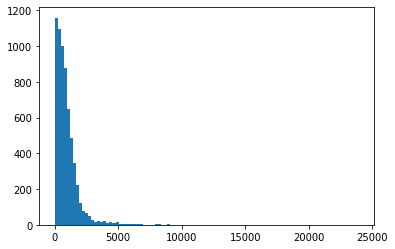

In [54]:
plt.hist(news['text_len'],bins = 100) #visualizing the text length
plt.show()

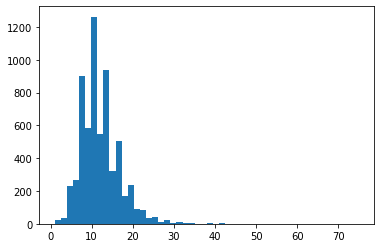

In [55]:
plt.hist(news['title_len'],bins = 50)
plt.show()

##Preprocessing the text

In [57]:
#converting o lower form and lemmatizing the text
def preprocessing(txt):
  txt = nltk.word_tokenize(txt)
  
  return ' '.join([lem.lemmatize(w.lower()) for w in txt])

In [58]:
#applying preprocessing function to columns

news['text'] = news['text'].apply(preprocessing)
news['title'] = news['title'].apply(preprocessing)

In [59]:
news.head()

,Unnamed: 0,title,text,label,title_len,text_len
0,8476,you can smell hillary ’ s fear,"daniel greenfield , a shillman journalism fell...",FAKE,7,1473
1,10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,16,517
2,3608,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,REAL,9,484
3,10142,bernie supporter on twitter erupt in anger aga...,"— kaydee king ( @ kaydeeking ) november 9 , 20...",FAKE,18,498
4,875,the battle of new york : why this primary matter,it 's primary day in new york and front-runner...,REAL,10,376


In [60]:
stopwords_eng = set(stopwords.words('english')) #stop word removel
stopwords_eng.update(['wa','ha','could','say','said','would'])

##Visualizing the texts by Wordcloud

In [ ]:
real_txt = ' '.join(title for title in news[news['label']=='REAL'].text)#extracting words from real and fake labels
fake_txt = ' '.join(title for title in news[news['label']=='FAKE'].text)

In [61]:
real =' '.join(title for title in news[news['label']=='REAL'].title)#extracting title words from real and fake labels
fake = ' '.join(title for title in news[news['label']=='FAKE'].title)

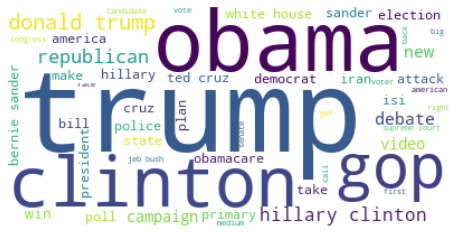

In [62]:
#wordloud for visualizing the most frequent words

import wordcloud

real_cloud = wordcloud.WordCloud(background_color='white',stopwords=stopwords_eng,max_words=50).generate(real)

plt.figure(figsize=[8,8])
plt.imshow(real_cloud,interpolation='bilinear',)
plt.axis('off')
plt.show()

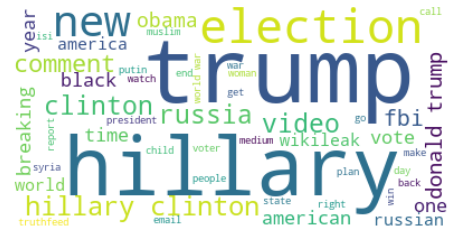

In [63]:
fake_cloud = wordcloud.WordCloud(background_color='white',stopwords=stopwords_eng,max_words=50).generate(fake)
plt.figure(figsize=[8,8])
plt.imshow(fake_cloud,interpolation='bilinear',)
plt.axis('off')
plt.show()

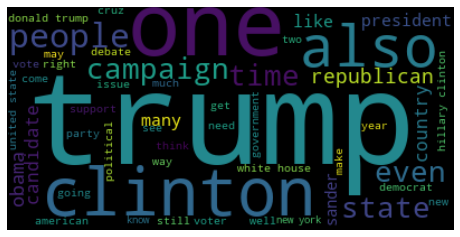

In [64]:
real_cloud = wordcloud.WordCloud(background_color='black',stopwords=stopwords_eng,max_words=50).generate(real_txt)
plt.figure(figsize=[8,8])
plt.imshow(real_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

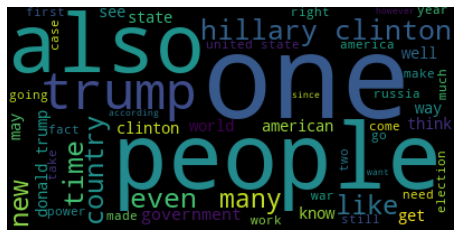

In [65]:
real_cloud = wordcloud.WordCloud(background_color='black',stopwords=stopwords_eng,max_words=50).generate(fake_txt)
plt.figure(figsize=[8,8])
plt.imshow(real_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

##Model

In [66]:
#importing libraries for modeling
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [91]:
X_train,X_test,y_train,y_test = train_test_split(news['text'],label,random_state = 5,stratify = label,test_size =0.2) #spliting the data into train and test data

In [68]:
tfid = TfidfVectorizer(stop_words='english',max_df=0.8) #it convrts the words into tfidf vector
tfid_train = tfid.fit_transform(X_train)

tfid_test = tfid.transform(X_test)

In [69]:
svm = SVC()
svm.fit(tfid_train,y_train)
print('Train Score : {0}'.format(svm.score(tfid_train,y_train)))

Train Score : 0.9974348855564326


##Model Performence Metrics 

In [89]:
pred = svm.predict(tfid_test)
print('Test Score : {0}'.format(accuracy_score(pred,y_test)))

Test Score : 0.9368587213891081


In [71]:
rep = classification_report(y_test,pred)
print(rep)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       633
           1       0.97      0.90      0.93       634

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



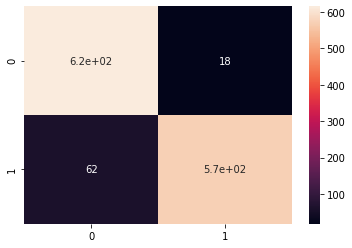

In [72]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [73]:
confusion_matrix(y_test,pred)

array([[615,  18],
       [ 62, 572]])

In [75]:
wrong_idx = np.where(pred != y_test)#extracting the wrong classified data indexes

1262    0
1263    0
1264    1
1265    1
1266    1
dtype: int64

In [98]:
#creating a dataframe for actual and predicted values
df = pd.DataFrame(columns=['Actual','Predicted'])
df['Actual'] = y_test
df['Predicted'] = pred
df.head()

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,1,1


In [99]:
wrong_class = df.iloc[wrong_idx]
wrong_class.head()

,Actual,Predicted
1,1,0
11,1,0
14,1,0
17,1,0
27,1,0
